In [1]:
import pyedflib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from scipy.stats import entropy
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import welch

from sympy import symbols, integrate, exp, sqrt, pi
from scipy.stats import norm

from collections import Counter            

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Conv1D, MaxPooling1D, LSTM, TimeDistributed, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

#import mne 

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
Data = pd.read_csv('preprocess_data.csv')

In [4]:
Data

,EEG-F4-M1-0,EEG-F4-M1-1,EEG-F4-M1-2,EEG-F4-M1-3,EEG-F4-M1-4,EEG-F4-M1-5,EEG-F4-M1-6,EEG-F4-M1-7,EEG-F4-M1-8,EEG-F4-M1-9,...,EEG-C3-M2-2992,EEG-C3-M2-2993,EEG-C3-M2-2994,EEG-C3-M2-2995,EEG-C3-M2-2996,EEG-C3-M2-2997,EEG-C3-M2-2998,EEG-C3-M2-2999,stage,ID
0,-3.930081e-08,-2.752613e-06,-0.000016,-2.100015e-05,-9.266994e-06,-4.756626e-06,-6.487018e-06,-1.326066e-05,-6.725163e-06,-0.000007,...,0.000005,0.000001,5.472239e-06,0.000008,4.845644e-06,-4.858999e-06,-2.731884e-06,0.000004,W,1
1,2.206198e-05,1.143693e-05,0.000011,9.615720e-06,3.302299e-06,-6.626010e-06,-9.614512e-06,-6.182679e-06,-4.238981e-06,-0.000009,...,-0.000018,-0.000019,-2.511404e-05,-0.000027,-1.295015e-05,-4.108459e-06,-6.732248e-06,-0.000010,W,1
2,1.738243e-06,2.901902e-07,-0.000005,-6.646966e-06,-1.012955e-05,-4.057563e-06,-2.169412e-06,1.224207e-06,3.649661e-06,0.000005,...,-0.000005,0.000002,1.034213e-05,0.000017,1.358853e-05,4.993228e-06,-8.639970e-07,-0.000006,W,1
3,-4.877598e-07,3.606197e-06,0.000020,2.350197e-05,1.336017e-05,-1.556827e-06,-8.328076e-06,-4.299849e-06,-1.192264e-06,-0.000003,...,-0.000016,-0.000013,-4.913854e-06,0.000002,3.985698e-06,5.675279e-06,2.490789e-06,0.000009,W,1
4,7.641425e-06,1.459152e-05,0.000014,-4.653693e-06,-1.876359e-05,-1.896442e-05,-8.432039e-06,3.763357e-07,-9.768084e-07,0.000015,...,0.000006,0.000005,2.608840e-06,-0.000004,5.744112e-07,5.235654e-06,5.984216e-06,0.000002,W,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,-1.951662e-05,-1.896086e-05,-0.000021,-2.212519e-05,-1.695032e-05,-1.525616e-05,-2.339083e-05,-2.363883e-05,-2.495932e-05,-0.000020,...,0.000018,0.000004,6.528647e-06,0.000027,2.888554e-05,1.641159e-05,1.102474e-05,0.000012,N1,5
4635,1.718790e-05,1.855726e-05,0.000014,2.336182e-05,1.528183e-06,-1.343305e-05,-2.410031e-05,-4.665877e-05,-4.590647e-05,-0.000045,...,0.000008,0.000013,-7.864986e-07,0.000003,-9.038034e-06,8.689278e-07,2.159830e-06,0.000010,W,5
4636,5.332112e-06,2.690346e-06,0.000002,6.983308e-08,7.987080e-06,6.387388e-06,1.045459e-05,7.610811e-06,-1.600828e-06,-0.000002,...,0.000012,0.000018,1.899571e-05,0.000005,-3.811628e-06,-6.581015e-06,1.707056e-06,0.000003,W,5
4637,-6.691352e-06,-1.420788e-06,0.000002,2.312685e-06,-6.104485e-08,-5.189604e-07,-4.364458e-06,-4.612226e-06,-5.892235e-08,0.000002,...,-0.000017,-0.000011,-1.973569e-05,-0.000019,-2.917092e-05,-2.136056e-05,-2.867913e-05,-0.000021,W,5


In [4]:
selected_columns = Data.iloc[:, :-2]

#  get max amplitude 
max_values = selected_columns.max()

print(max(max_values))

0.0009133765185074


In [5]:
# get min amplitude 
min_values = selected_columns.min()

print(min(min_values))

-0.0009646681211674


In [6]:
n = len(Data)

In [33]:
# shannon entropy
def calculate_shannon_entropy(signal):
    hist, bin_edges = np.histogram(signal, bins=16, density=True)
    
    return entropy(hist)

In [34]:
SE = []

In [36]:
for i in range(n):
    for j in range(4):
        signal = Data.iloc[i,j*100*30:(j+1)*100*30]
        shannon_entropy = calculate_shannon_entropy(signal) 
        SE.append(shannon_entropy)

In [37]:
SE = np.array(SE)
SE = SE.reshape(4639 , 4)

In [38]:
SE = pd.DataFrame(SE)
SE.columns = ['EEG' + str(i) + '_SE' for i in range(1,5)] 

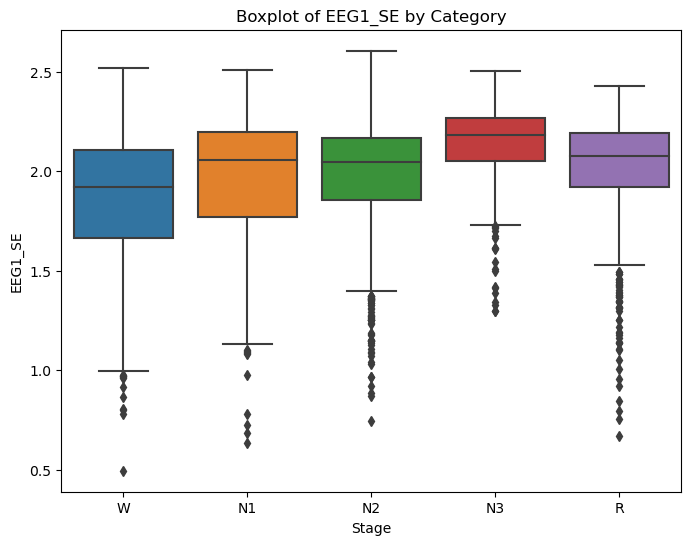

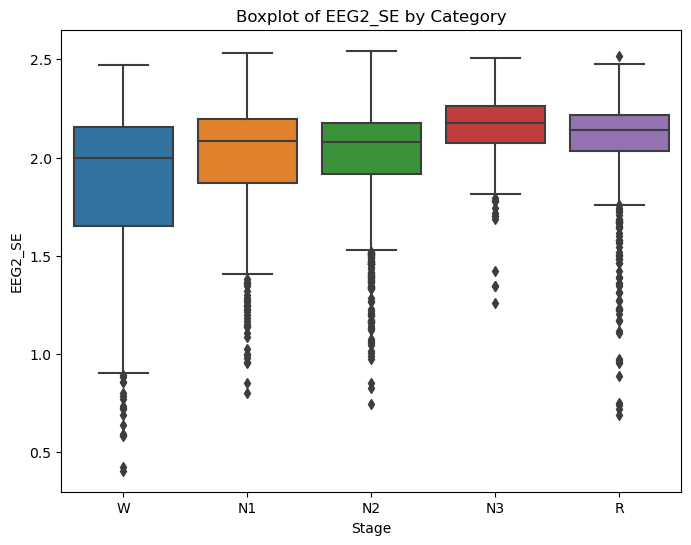

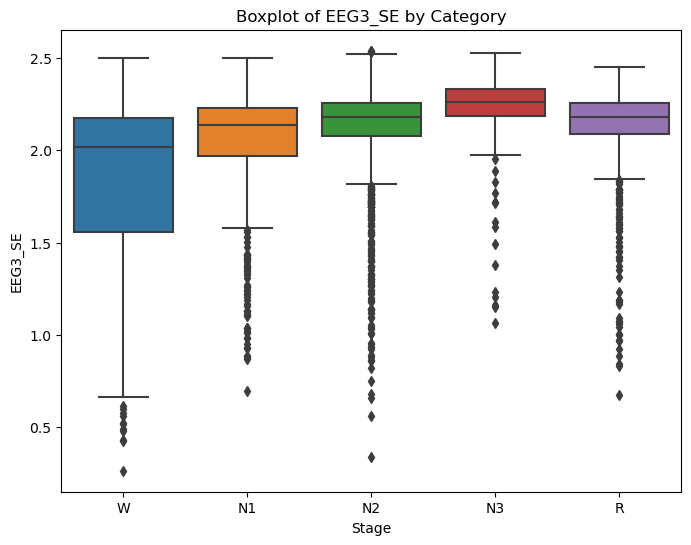

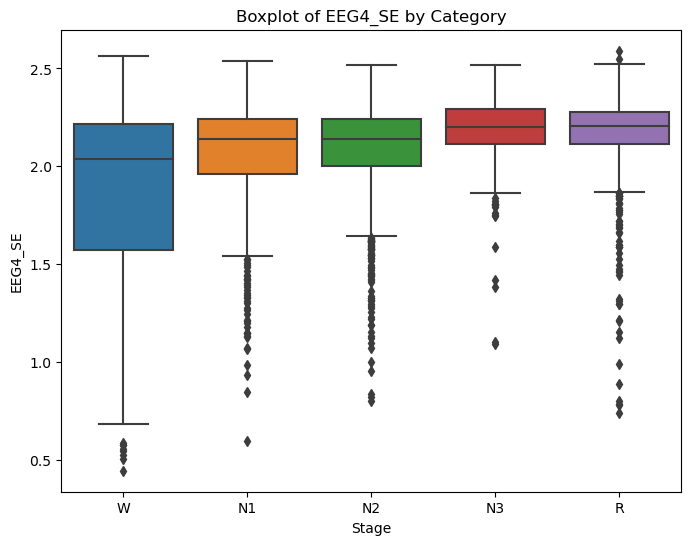

In [39]:
features = SE
features['Stage'] = Data['stage']

for column in features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Stage', y=column, data=SE) 
    plt.title(f'Boxplot of {column} by Category')
    plt.show()


In [11]:
# dispersion entropy

def calculate_dispersion_entropy(signal , d = 1 , m = 4, c= 6 , Normalized = True):
    
    N = len(signal)
    num = N - (m - 1)*d
    
    mu = np.mean(signal)
    sigma = np.var(signal)**0.5
    
    y = [norm.cdf(x, mu, sigma) for x in signal]
    
    z = [round(x*c+0.5) for x in y]
    
    zmc = []
    
    for i in range(num):
        zc = []
        for j in range(m):
            zc.append(z[i+j*d])
        zmc.append(tuple(zc))
        
    counts = np.array(list(Counter(zmc).values()))
    probabilities = counts/num
    entropy = -np.sum(probabilities * np.log(probabilities))
    
    if Normalized:
        entropy = entropy/np.log(c**m)
        
    return entropy

In [14]:
DE = []

for i in range(n):
    for j in range(4):
        signal = Data.iloc[i,j*100*30:(j+1)*100*30]
        dispersion_entropy = calculate_dispersion_entropy(signal) 
        DE.append(dispersion_entropy)

DE = np.array(DE)
DE = DE.reshape(4639 , 4)
DE = pd.DataFrame(DE)
DE.columns = ['EEG' + str(i) + '_DE' for i in range(1,5)] 

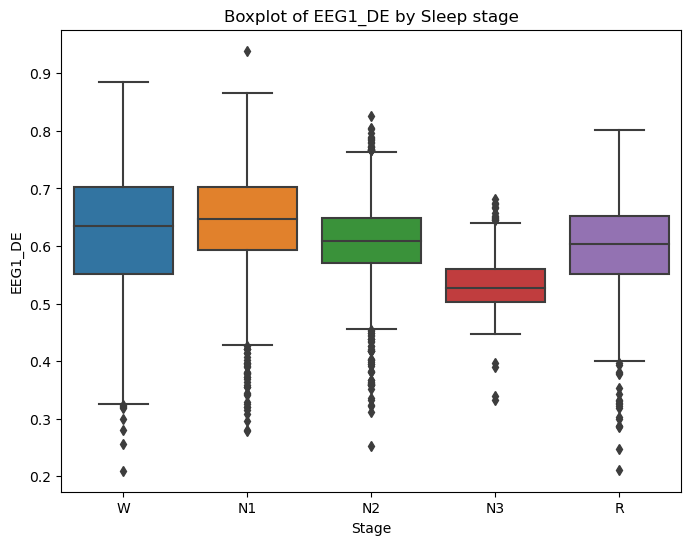

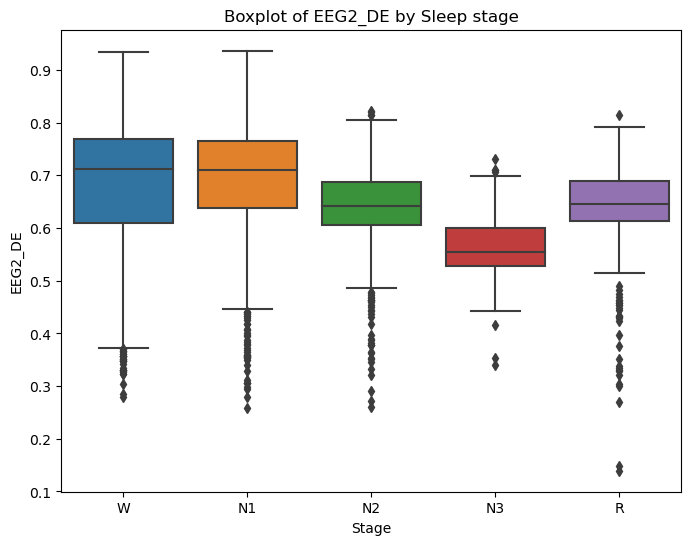

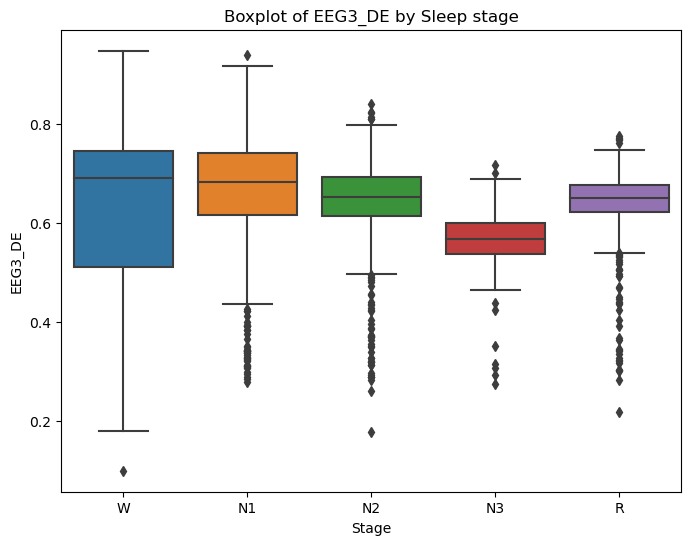

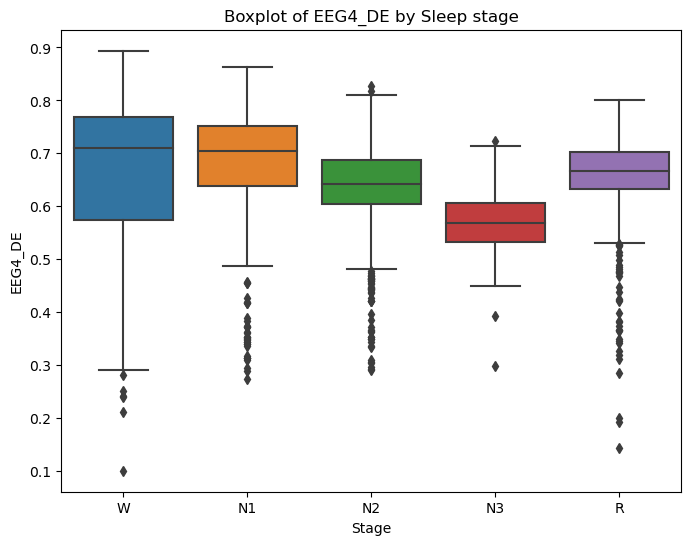

In [15]:
features = DE
features['Stage'] = Data['stage']

for column in features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Stage', y=column, data=features) 
    plt.title(f'Boxplot of {column} by Sleep stage')
    plt.show()

In [16]:
# Approximate Entropy
def calculate_approximate_entropy(signal, m, r):
    signal = np.array(signal).astype(float)
    def _phi(m):
        x = np.array([signal[i:i+m] for i in range(N-m+1)])
        C = np.sum(np.abs(x[:, np.newaxis] - x) <= r, axis=0) / (N-m+1)
        return np.sum(np.log(C)) / (N-m+1)
    
    N = len(signal)
    return _phi(m) - _phi(m+1)

In [17]:
# parameters
m = 2  # dimensions
r = abs(max(max_values) - min(min_values))**2  # Similarity threshold

AE = []

for i in range(n):
    for j in range(4):
        signal = Data.iloc[i,j*100*30:(j+1)*100*30]
         
        apen = calculate_approximate_entropy(signal, m, r)

        AE.append(apen)

AE = np.array(AE)
AE = AE.reshape(4639 , 4)
AE = pd.DataFrame(AE)
AE.columns = ['EEG' + str(i) + '_AE' for i in range(1,5)] 

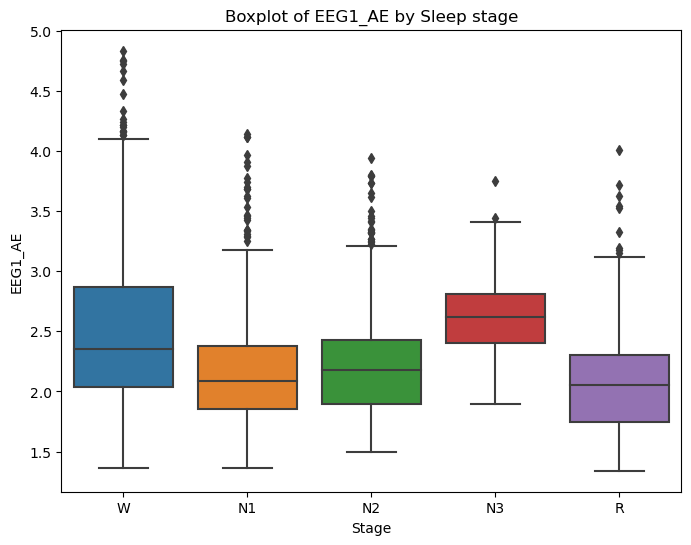

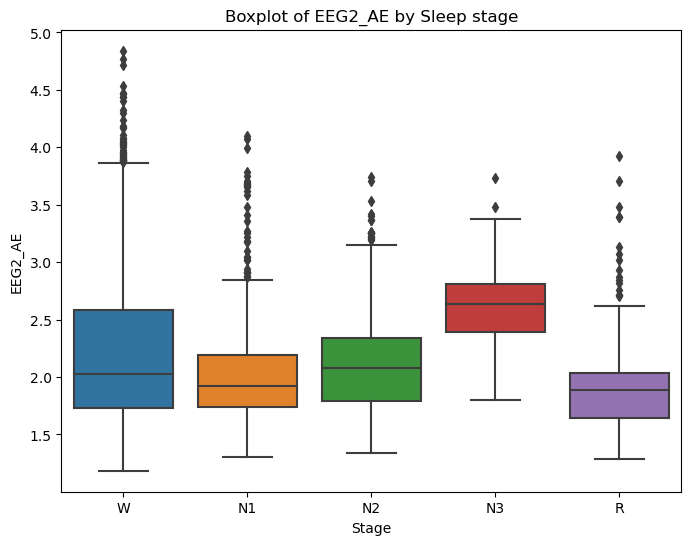

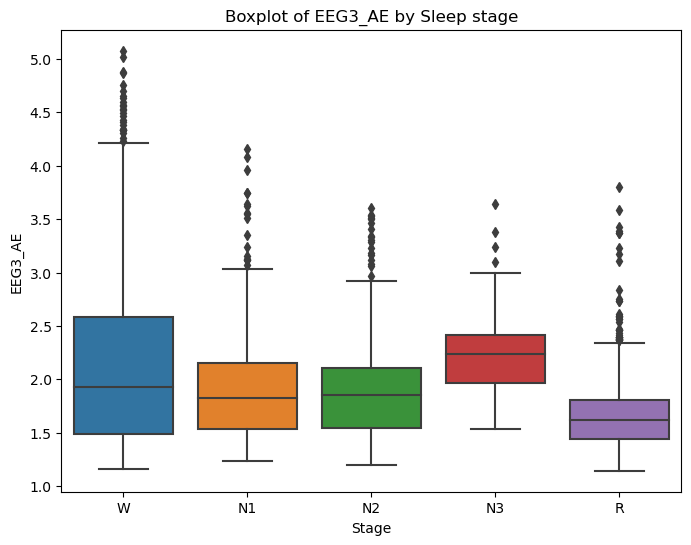

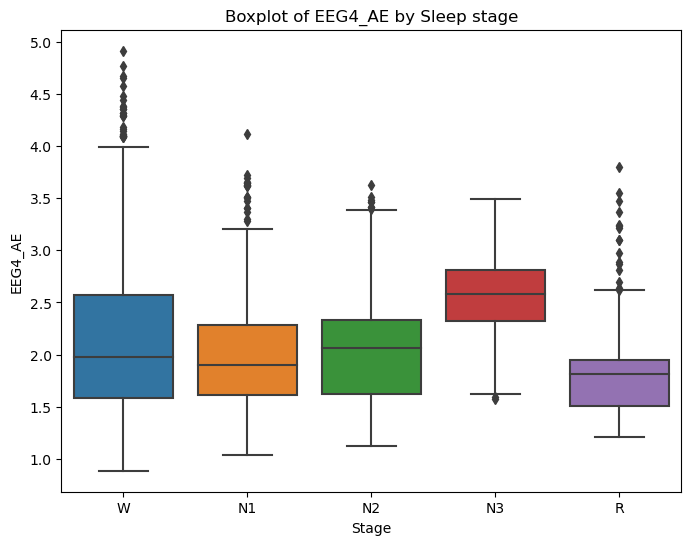

In [32]:
features = AE
features['Stage'] = Data['stage']

for column in features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Stage', y=column, data=features) 
    plt.title(f'Boxplot of {column} by Sleep stage')
    plt.show()

In [7]:
# Hurst exponent

def calculate_Hc(data, simplified=True):
    
    min_max_scaler = MinMaxScaler()
    data = min_max_scaler.fit_transform(np.array(data).reshape(-1, 1))
    
    # Calculate cumulative deviation
    data_len = data.size
    y = np.cumsum(data - np.mean(data))
    z = np.zeros(data_len)
    
    # Calculation scale range
    R = np.zeros(data_len)
    S = np.zeros(data_len)
    for t in range(data_len):
        z[:t+1] = y[:t+1] - y[:t+1].mean()
        R[t] = max(z[:t+1]) - min(z[:t+1])
        S[t] = np.std(data[:t+1])
        
        with np.errstate(divide='ignore', invalid='ignore'):
            R_S = R / S
            log_R_S = np.log(R_S)
            valid_indices = ~np.isinf(log_R_S) & ~np.isnan(log_R_S) 
            log_R_S = log_R_S[valid_indices]    
            n = np.log(np.arange(1, data_len + 1))
            n = n[valid_indices]                
            if len(n) > 1:                     
                try:
                    A = np.column_stack((n, np.ones(n.size)))
                    H, c = np.linalg.lstsq(A, log_R_S, rcond=None)[0]
                except np.linalg.LinAlgError:
                    H, c = np.nan, np.nan      
            else:
                H, c = np.nan, np.nan           

    return H, c, data_len

In [8]:
HC = []

for i in range(n):
    for j in range(4):
        signal = Data.iloc[i,j*100*30:(j+1)*100*30]
        H, c, data_len = calculate_Hc(signal) 
        HC.append(H)
        
HC = np.array(HC)
HC = HC.reshape(n , 4)
HC = pd.DataFrame(HC)
HC.columns = ['EEG' + str(i) + '_HC' for i in range(1,5)] 

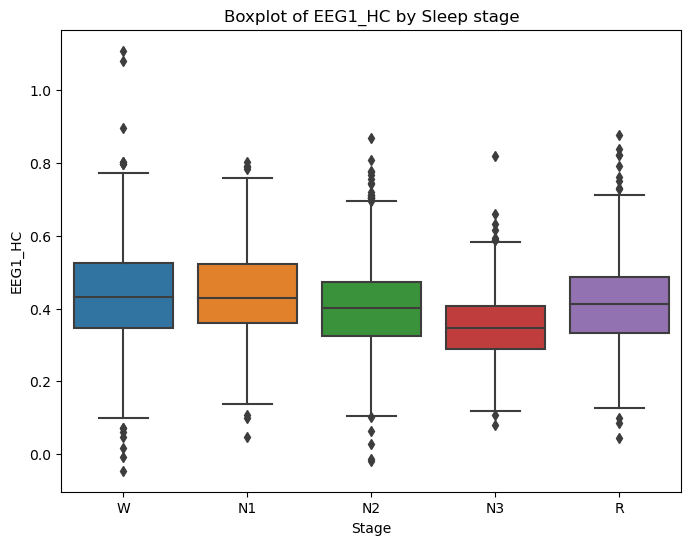

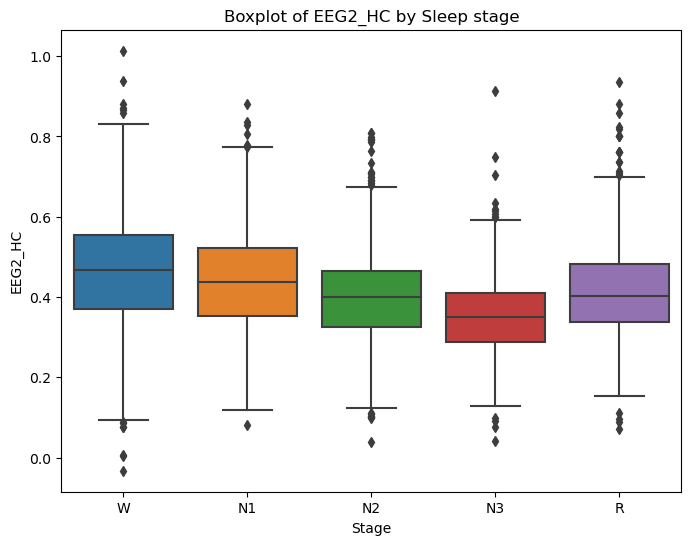

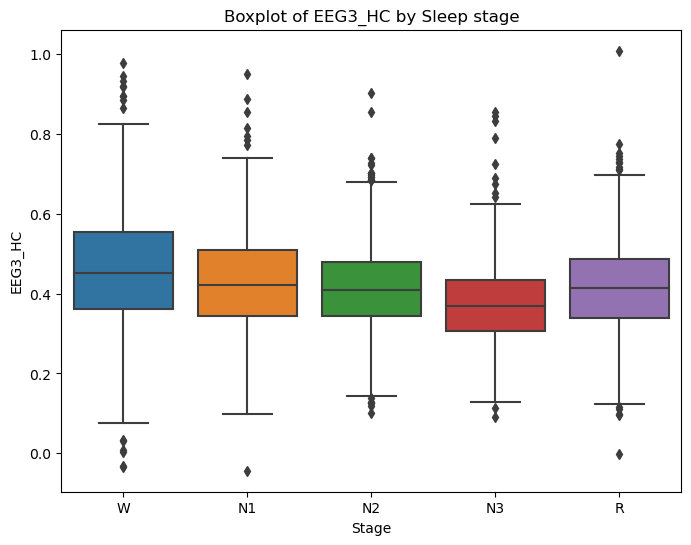

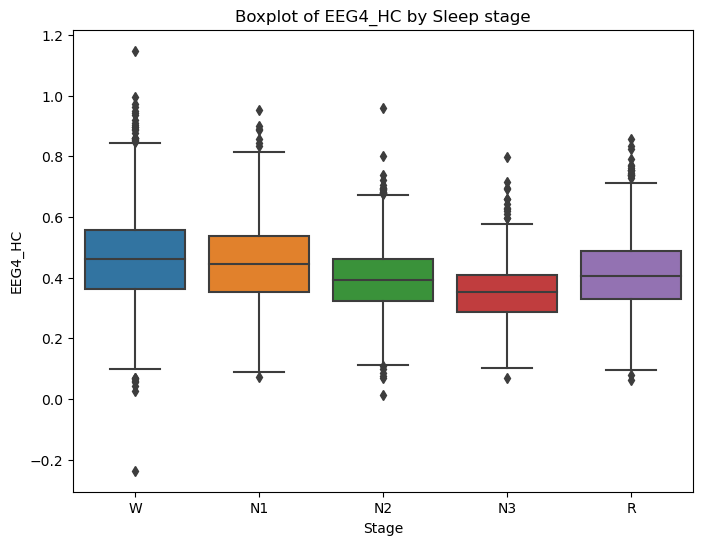

In [9]:
features = HC
features['Stage'] = Data['stage']

for column in features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Stage', y=column, data=features) 
    plt.title(f'Boxplot of {column} by Sleep stage')
    plt.show()

In [28]:
start = time.time()

def fuzzy_entropy(data, m, r):

    
    # Exponential fuzzy similarity function
    def exponential_similarity(d, r):
        
        return np.exp(-d / r)

    N = len(data)
    phi_m = 0
    phi_m1 = 0

    for i in range(N - m):
        for j in range(i, N - m):

            d_m = np.max(np.abs(data[i:i + m] - data[j:j + m]))
            # Calculate the distance of a template with a length of m+1
            d_m1 = np.max(np.abs(data[i:i + m + 1] - data[j:j + m + 1]))
            
            # Accumulated fuzzy similarity
            phi_m += exponential_similarity(d_m, r)
            phi_m1 += exponential_similarity(d_m1, r)

    # Calculate average similarity
    phi_m /= (N - m) * (N - m - 1) / 2
    phi_m1 /= (N - m) * (N - m - 1) / 2

    # Calculate fuzzy entropy
    fuzzy_entropy_value = -np.log(phi_m1 / phi_m)
    return fuzzy_entropy_value



m = 2  
r = 0.00018 

0.011031243166397767
98.433034658432


In [ ]:
feature = pd.concat([HC.select_dtypes(exclude=['object'])SE.select_dtypes(exclude=['object']) , 
                     DE.select_dtypes(exclude=['object']), AE], axis=1)

In [16]:
feature.isna().sum().sum()

0

In [17]:
len(feature.columns)

17

In [4]:
from dtaidistance import dtw

In [6]:
from joblib import Parallel, delayed

In [7]:
def compute_dtw_for_row(row_data):
    row_data = pd.to_numeric(row_data, errors='coerce').to_numpy()
    distances = []
    row_data = [row_data[0:3000] , row_data[3000:6000] , 
                row_data[6000:9000] , row_data[9000:12000]]
    for i in range(len(row_data)):
        for j in range(i + 1, len(row_data)):
            distance = dtw.distance(row_data[i], row_data[j])
            distances.append(distance)
    return distances


In [46]:
results = Parallel(n_jobs=-1,verbose=5)(delayed(compute_dtw_for_row)(Data.iloc[row, :-2]) for row in range(n))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 114.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 184.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 266.6min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 365.5min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 479.0min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 607.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 752.2min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 911.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 1084.8min
[Parallel(n_jobs=-1)]: Done 2929 out of 2929 | elapsed: 1233.3min finished


In [26]:
DWT = pd.DataFrame(results)
DWT['Stage'] = Data['stage'].values
DWT = DWT.applymap(lambda x: np.sqrt(x) if np.issubdtype(type(x), np.number) else x)

In [76]:
col_names = []
for i in range(1,5):
    for j in range(i+1,5):
        col_names.append('DTW' + str(i) + str(j))
col_names.append('Stage')

In [77]:
DTW.columns = col_names
DTW

,DTW12,DTW13,DTW14,DTW23,DTW24,DTW34,Stage
0,0.016962,0.017800,0.018340,0.016169,0.016413,0.017353,W
1,0.016084,0.016265,0.017456,0.015162,0.016169,0.016867,W
2,0.014763,0.015663,0.016833,0.014854,0.016905,0.016456,W
3,0.015093,0.015383,0.016541,0.014723,0.016172,0.016346,W
4,0.014879,0.015805,0.016650,0.015313,0.016181,0.016441,W
...,...,...,...,...,...,...,...
4634,0.023468,0.036627,0.033372,0.029100,0.035605,0.041736,N1
4635,0.026940,0.032203,0.043528,0.020953,0.036683,0.036497,W
4636,0.015143,0.016932,0.019595,0.015497,0.018505,0.018662,W
4637,0.014681,0.017711,0.020997,0.017510,0.021004,0.021083,W


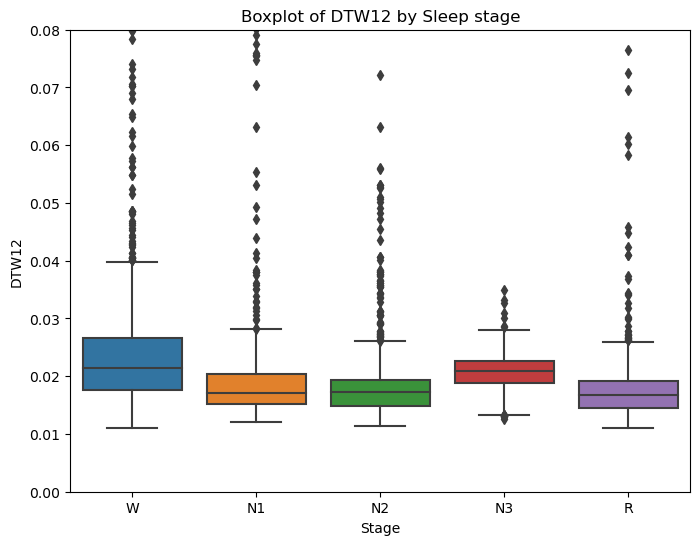

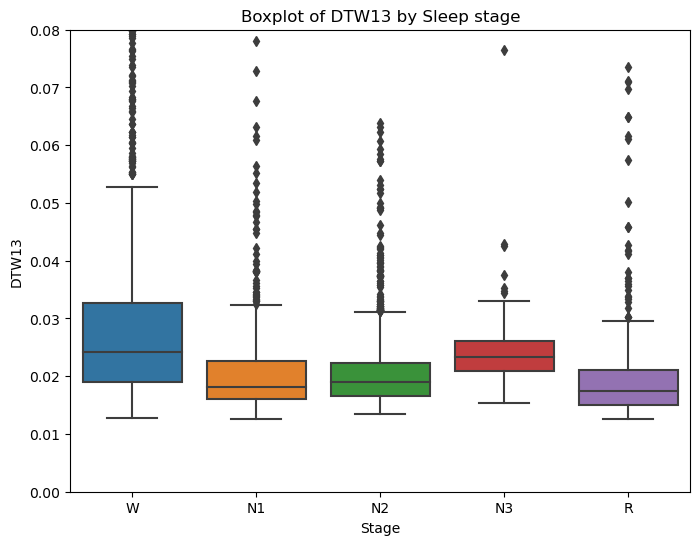

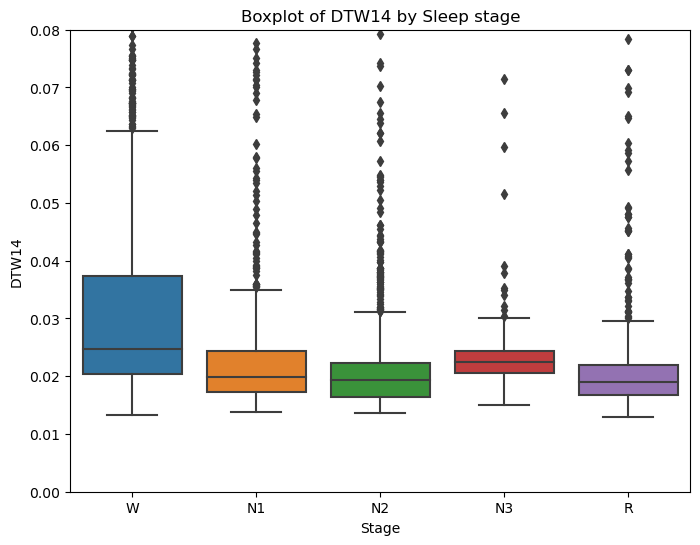

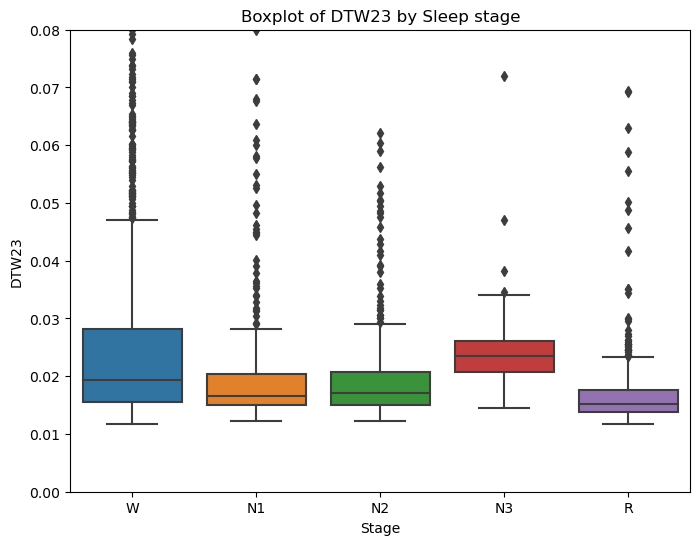

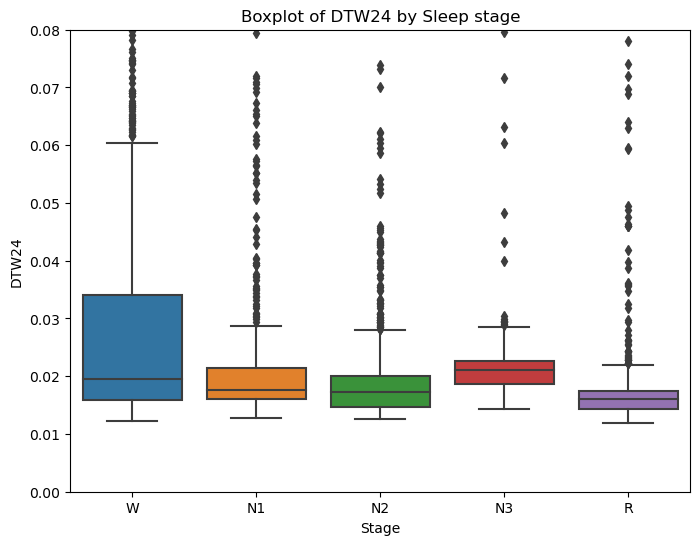

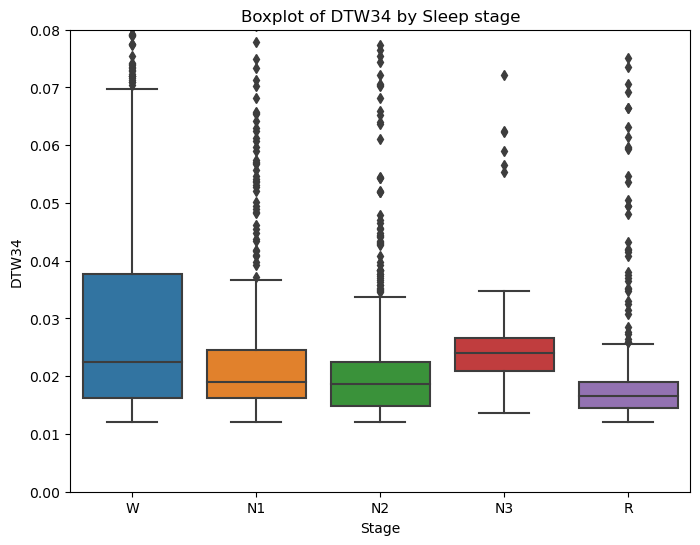

In [79]:
for column in DTW.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    plt.ylim([0, 0.08])
    sns.boxplot(x='Stage', y=column, data=DTW) 
    plt.title(f'Boxplot of {column} by Sleep stage')
    plt.show()

In [7]:
features = pd.concat([feature.select_dtypes(exclude=['object']), DTW], axis=1)

In [8]:
features

,EEG1_HC,EEG2_HC,EEG3_HC,EEG4_HC,EEG1_SE,EEG2_SE,EEG3_SE,EEG4_SE,EEG1_DE,EEG2_DE,...,EEG2_AE,EEG3_AE,EEG4_AE,DTW12,DTW13,DTW14,DTW23,DTW24,DTW34,Stage
0,0.290820,0.267599,0.335005,0.340770,2.173185,2.291572,2.123666,2.256856,0.712265,0.701614,...,1.878138,2.118630,2.029427,0.016962,0.017800,0.018340,0.016169,0.016413,0.017353,W
1,0.546924,0.515472,0.467571,0.534379,2.255793,2.242239,2.268926,2.172522,0.718175,0.720605,...,1.818256,1.935162,1.769035,0.016084,0.016265,0.017456,0.015162,0.016169,0.016867,W
2,0.568201,0.396790,0.462065,0.335742,2.378528,2.149019,2.206753,2.179514,0.749171,0.769257,...,1.635736,1.875498,1.922582,0.014763,0.015663,0.016833,0.014854,0.016905,0.016456,W
3,0.727172,0.587920,0.556282,0.457914,2.196304,2.173284,2.374547,2.103550,0.747833,0.760236,...,1.709370,1.820107,1.793391,0.015093,0.015383,0.016541,0.014723,0.016172,0.016346,W
4,0.372004,0.489312,0.314138,0.576369,2.327406,2.166375,2.138596,2.201774,0.729090,0.769817,...,1.650093,1.855813,1.818817,0.014879,0.015805,0.016650,0.015313,0.016181,0.016441,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,0.335857,0.410468,0.300228,0.276756,1.621920,1.630917,1.346387,1.586188,0.607810,0.624600,...,2.502717,2.692293,2.785978,0.023468,0.036627,0.033372,0.029100,0.035605,0.041736,N1
4635,0.479301,0.428890,0.385556,0.519703,1.635054,1.491134,1.454071,1.936643,0.423160,0.464464,...,2.843379,2.714932,2.614030,0.026940,0.032203,0.043528,0.020953,0.036683,0.036497,W
4636,0.525649,0.365365,0.360381,0.602243,2.027865,2.219524,2.104737,1.987850,0.712698,0.763721,...,1.776965,1.773306,1.872869,0.015143,0.016932,0.019595,0.015497,0.018505,0.018662,W
4637,0.520821,0.469302,0.700256,0.794421,2.043425,2.088381,2.223531,2.380100,0.712170,0.713556,...,2.028990,1.858679,2.353562,0.014681,0.017711,0.020997,0.017510,0.021004,0.021083,W


In [9]:
features.to_csv('features.csv' , index=False)